<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 15. <b>Метод главных компонент PCA и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Собственные числа и собственные векторы</a></li>
        <li><a href="#2">Метод главных компонент (PCA)</a></li>
        <li><a href="#3">Уменьшение размерности с PCA при классификации</a>
        <li><a href="#4">Источники</a>
        </li>
    </ol>
</div>

<p><b>Подключение библиотек</b></p>

In [1]:
import numpy as np
from numpy import linalg

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.decomposition import PCA

In [4]:
from sklearn import linear_model

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Собственные числа и собственные векторы</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Исходные данные</b></p>

|$X_1$|$X_2$|$Y$|
|-|-|-|
|1|2|0|
|2|3|0|
|3|5|0|
|4|2|0|
|4|5|1|
|6|4|1|
|7|6|1|
|8|5|1|

In [5]:
x1 = np.array([1,2,3,4,4,6,7,8])
x2 = np.array([2,3,5,2,5,4,6,5])
y  = np.array([0,0,0,0,1,1,1,1])

In [6]:
X = np.vstack((x1, x2))
X

array([[1, 2, 3, 4, 4, 6, 7, 8],
       [2, 3, 5, 2, 5, 4, 6, 5]])

<p>График</p>

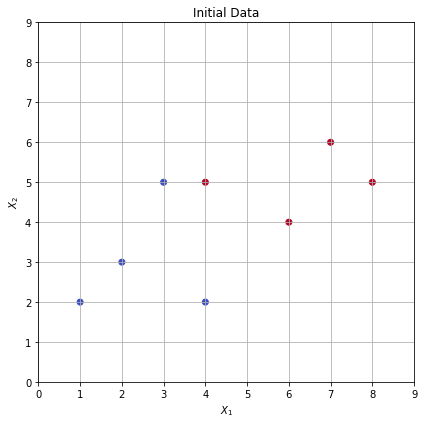

In [7]:
plt.figure(figsize=[6,6])
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.coolwarm)
plt.xlim([0,9])
plt.ylim([0,9])
plt.title("Initial Data")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)
plt.tight_layout()
plt.show()

<p><b>Среднее значение</b></p>

In [8]:
x1_mean = np.mean(X[0,:])
x2_mean = np.mean(X[1,:])
x1_mean, x2_mean

(4.375, 4.0)

<p><b>Дисперсия</b></p>

In [9]:
x1_var = np.var(X[0,:], ddof=0)
x2_var = np.var(X[1,:], ddof=0)
x1_var, x2_var

(5.234375, 2.0)

<p><b>Вычисление ковариационной матрицы</b></p>

In [10]:
cov_matrix = np.cov(X, ddof=0)
cov_matrix

array([[ 5.234375,  2.125   ],
       [ 2.125   ,  2.      ]])

<p><b>Вычисление собственнных чисел и векторов</b></p>

In [11]:
eigen_values, eigen_vectors = linalg.eig(cov_matrix)

In [12]:
eigen_values

array([ 6.28756583,  0.94680917])

<p>Собственные векторы</p>

In [13]:
eigen_vectors

array([[ 0.89599174, -0.44407072],
       [ 0.44407072,  0.89599174]])

<p>Первый собственный вектор</p>

In [14]:
v1 = eigen_vectors[:,0]
v1

array([ 0.89599174,  0.44407072])

<p>Второй собственный вектор</p>

In [15]:
v2 = eigen_vectors[:,1]
v2

array([-0.44407072,  0.89599174])

<p>Вычисление направляющих собственных векторов</p>

<p><i>Способ 1</i></p>

In [16]:
xx = np.array([-6, 6])

In [17]:
t1 = v1.reshape(-1,1).dot(xx.reshape(1,-1)) + np.array([[x1_mean], [x2_mean]])
t1

array([[-1.00095043,  9.75095043],
       [ 1.33557568,  6.66442432]])

In [18]:
t2 = v2.reshape(-1,1).dot(xx.reshape(1,-1)) + np.array([[x1_mean], [x2_mean]])
t2

array([[ 7.03942432,  1.71057568],
       [-1.37595043,  9.37595043]])

<p><i>Способ 2</i></p>

In [19]:
xx = np.array([0, 9])

In [20]:
f_v1 = lambda x: v1[1]/v1[0] * (x - x1_mean) + x2_mean
f_v2 = lambda x: v2[1]/v2[0] * (x - x1_mean) + x2_mean

<p>Графики</p>

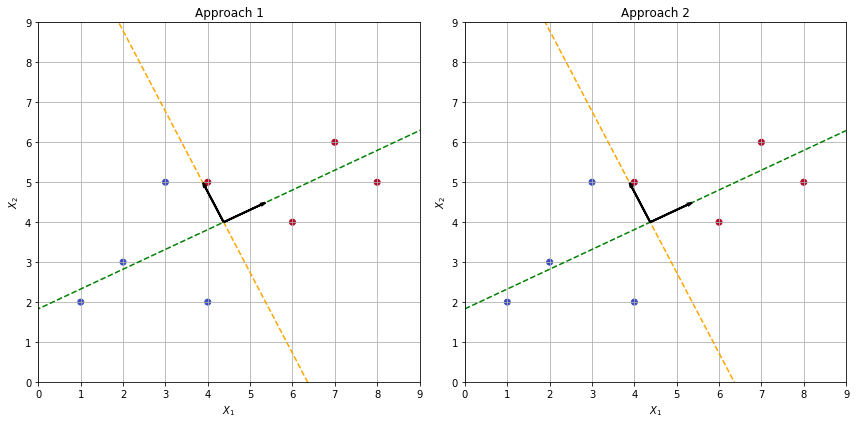

In [21]:
plt.figure(figsize=[12,6])

plt.subplot(1, 2, 1)
plt.title("Approach 1")
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.coolwarm)
plt.plot(t1[0,:], t1[1,:], "--", c="green")
plt.plot(t2[0,:], t2[1,:], "--", c="orange")
plt.arrow(x1_mean, x2_mean, v1[0], v1[1], linewidth=2, head_width=0.05, 
          head_length=0.1, color="black", zorder=10)
plt.arrow(x1_mean, x2_mean, v2[0], v2[1], linewidth=2, head_width=0.05, 
          head_length=0.1, color="black", zorder=10)
plt.xlim([0,9])
plt.ylim([0,9])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title("Approach 2")
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.coolwarm)
plt.plot(xx, f_v1(xx), "--", c="green")
plt.plot(xx, f_v2(xx), "--", c="orange")
plt.arrow(x1_mean, x2_mean, v1[0], v1[1], linewidth=2, head_width=0.05, 
          head_length=0.1, color="black", zorder=10)
plt.arrow(x1_mean, x2_mean, v2[0], v2[1], linewidth=2, head_width=0.05, 
          head_length=0.1, color="black", zorder=10)
plt.xlim([0,9])
plt.ylim([0,9])
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

plt.tight_layout()

plt.show()

<p><b>Преобразование исходных данных в новый базис</b></p>

<p>Перенос центра координат</p>

In [22]:
X_adj = X - np.array([[x1_mean], [x2_mean]])
X_adj

array([[-3.375, -2.375, -1.375, -0.375, -0.375,  1.625,  2.625,  3.625],
       [-2.   , -1.   ,  1.   , -2.   ,  1.   ,  0.   ,  2.   ,  1.   ]])

<p>Преобразование</p>

In [23]:
eigen_vectors.T

array([[ 0.89599174,  0.44407072],
       [-0.44407072,  0.89599174]])

In [24]:
X_new = eigen_vectors.T.dot(X_adj)
X_new

array([[-3.91211356, -2.5720511 , -0.78791792, -1.22413834,  0.10807382,
         1.45598658,  3.24011975,  3.69204077],
       [-0.2932448 ,  0.15867622,  1.50658898, -1.62545696,  1.06251826,
        -0.72161492,  0.62629784, -0.71376462]])

<p>Проекция на первый собственный вектор</p>

In [25]:
x1_new = v1.dot(X_adj)
x1_new

array([-3.91211356, -2.5720511 , -0.78791792, -1.22413834,  0.10807382,
        1.45598658,  3.24011975,  3.69204077])

<p>Проекция на второй собственный вектор</p>

In [26]:
x2_new = v2.dot(X_adj)
x2_new

array([-0.2932448 ,  0.15867622,  1.50658898, -1.62545696,  1.06251826,
       -0.72161492,  0.62629784, -0.71376462])

<p>График</p>

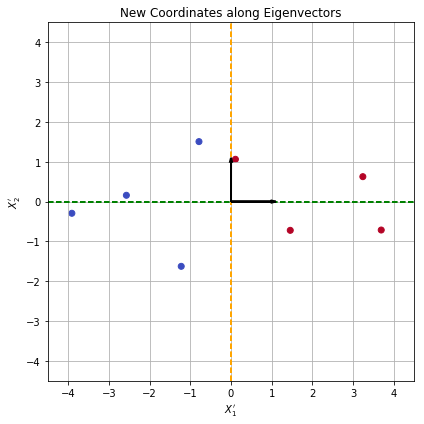

In [27]:
plt.figure(figsize=[6,6])

plt.axvline(x=0, lw=2, c="orange", ls="--")
plt.axhline(y=0, lw=2, c="green", ls="--")
#plt.scatter(x1_new, x2_new, c=y, cmap=plt.cm.coolwarm)
plt.scatter(X_new[0,:], X_new[1,:], c=y, cmap=plt.cm.coolwarm)


plt.grid(True)
plt.title("New Coordinates along Eigenvectors")
plt.arrow(0, 0, 0, 1, linewidth=2, head_width=0.05, head_length=0.1, color="black", zorder=10)
plt.arrow(0, 0, 1, 0, linewidth=2, head_width=0.05, head_length=0.1, color="black", zorder=10)

plt.xlim([-4.5,4.5])
plt.ylim([-4.5,4.5])

plt.xlabel("$X_1'$")
plt.ylabel("$X_2'$")

plt.tight_layout()

plt.show()

<p>Графики проекций</p>

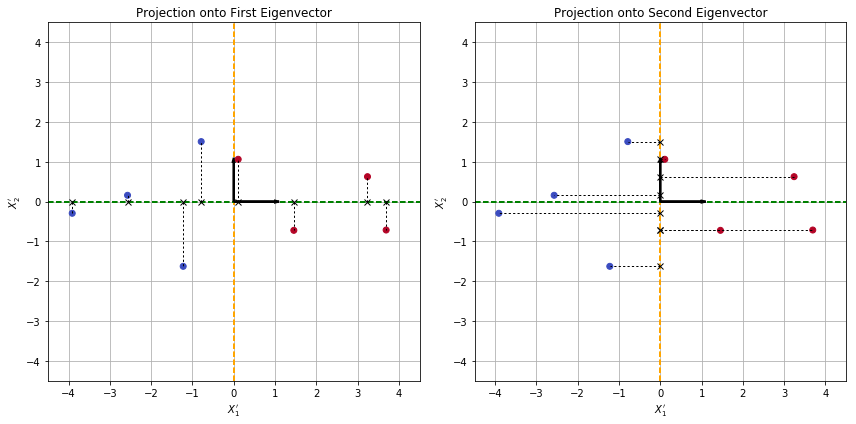

In [28]:
plt.figure(figsize=[12,6])

plt.subplot(1, 2, 1)
plt.axvline(x=0, lw=2, c="orange", ls="--")
plt.axhline(y=0, lw=2, c="green", ls="--")
plt.arrow(0, 0, 0, 1, linewidth=2, head_width=0.05, head_length=0.1, color="black", zorder=2)
plt.arrow(0, 0, 1, 0, linewidth=2, head_width=0.05, head_length=0.1, color="black", zorder=2)
plt.scatter(x1_new, x2_new, c=y, cmap=plt.cm.coolwarm, zorder=3)
plt.vlines(x1_new, ymin=0, ymax=x2_new, colors="black", linestyles="dotted", lw=1, zorder=3)
plt.plot(x1_new, np.zeros(len(x1_new)), "x", color="black", lw=2, zorder=3)
plt.title("Projection onto First Eigenvector")
plt.grid(True)
plt.xlim([-4.5,4.5])
plt.ylim([-4.5,4.5])
plt.xlabel("$X_1'$")
plt.ylabel("$X_2'$")

plt.subplot(1, 2, 2)
plt.axvline(x=0, lw=2, c="orange", ls="--")
plt.axhline(y=0, lw=2, c="green", ls="--")
plt.arrow(0, 0, 0, 1, linewidth=2, head_width=0.05, head_length=0.1, color="black", zorder=2)
plt.arrow(0, 0, 1, 0, linewidth=2, head_width=0.05, head_length=0.1, color="black", zorder=2)
plt.scatter(x1_new, x2_new, c=y, cmap=plt.cm.coolwarm, zorder=3)
plt.hlines(x2_new, xmin=0, xmax=x1_new, colors="black", linestyles="dotted", lw=1, zorder=3)
plt.plot(np.zeros(len(x2_new)), x2_new, "x", color="black", lw=2, zorder=3)
plt.title("Projection onto Second Eigenvector")
plt.grid(True)
plt.xlim([-4.5,4.5])
plt.ylim([-4.5,4.5])
plt.xlabel("$X_1'$")
plt.ylabel("$X_2'$")

plt.tight_layout()

plt.show()

<p><b>Восстановление преобразованных данных в исходную систему координат</b></p>

<p>Преобразованные данные в 1D</p>

In [29]:
x1_new

array([-3.91211356, -2.5720511 , -0.78791792, -1.22413834,  0.10807382,
        1.45598658,  3.24011975,  3.69204077])

<p>Собственный вектор, использованный при преобразовании</p>

In [30]:
v1

array([ 0.89599174,  0.44407072])

<p>Восстановление в 2D</p>

<p><i>Преобразование в матричный вид</i></p>

In [31]:
v1_mat_T = v1.reshape(1,-1)
v1_mat_T

array([[ 0.89599174,  0.44407072]])

In [32]:
X1_mat = x1_new.reshape(-1,1)
X1_mat

array([[-3.91211356],
       [-2.5720511 ],
       [-0.78791792],
       [-1.22413834],
       [ 0.10807382],
       [ 1.45598658],
       [ 3.24011975],
       [ 3.69204077]])

<p><i>Восстановление</i></p>

In [33]:
X_init = X1_mat.dot(v1_mat_T) + np.array([[x1_mean, x2_mean]])
X_init

array([[ 0.86977857,  2.26274492],
       [ 2.07046346,  2.85782742],
       [ 3.66903205,  3.65010872],
       [ 3.27818216,  3.456396  ],
       [ 4.47183325,  4.04799242],
       [ 5.67955194,  4.64656101],
       [ 7.27812053,  5.43884231],
       [ 7.68303803,  5.6395272 ]])

<p>Графики</p>

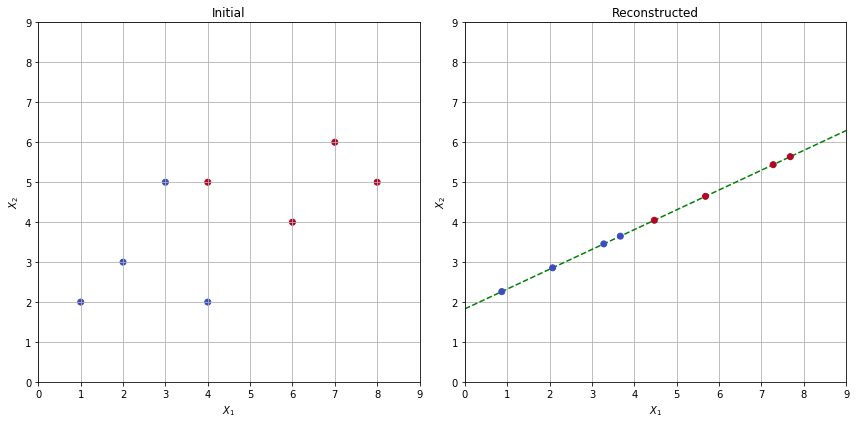

In [34]:
plt.figure(figsize=[12,6])

plt.subplot(1, 2, 1)
plt.scatter(X[0,:], X[1,:], c=y, cmap=plt.cm.coolwarm)
plt.xlim([0,9])
plt.ylim([0,9])
plt.title("Initial")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(xx, f_v1(xx), "--", c="green")
plt.scatter(X_init[:,0], X_init[:,1], c=y, cmap=plt.cm.coolwarm, zorder=3)
plt.xlim([0,9])
plt.ylim([0,9])
plt.title("Reconstructed")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

plt.tight_layout()

plt.show()

<a name="2"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">2. Метод главных компонент (PCA)</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [35]:
from sklearn.decomposition import PCA

<p>Конфигурирование PCA с одной главной компонентой</p>

In [36]:
pca = PCA(n_components=1)
pca

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<p>Выполнение PCA</p>

In [37]:
pca.fit(X.T)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

<p>Полученные параметры</p>

<p><i>Среднее значение</i></p>

In [38]:
pca.mean_

array([ 4.375,  4.   ])

In [39]:
x1_mean, x2_mean

(4.375, 4.0)

<p><i>Компоненты</i></p>

In [40]:
pca.components_

array([[-0.89599174, -0.44407072]])

In [41]:
eigen_vectors # при сравнении обратите внимание на знаки векторов

array([[ 0.89599174, -0.44407072],
       [ 0.44407072,  0.89599174]])

<p><i>Дисперсия</i></p>

In [42]:
pca.explained_variance_

array([ 6.28756583])

In [43]:
eigen_values

array([ 6.28756583,  0.94680917])

In [44]:
np.var(x1_new, ddof=0)

6.287565827158204

In [45]:
np.var(x2_new, ddof=0)

0.94680917284179544

<p>PCA преобразование 2D в 1D</p>

<p><i>С использованием sklearn PCA</i></p>

In [46]:
X1_mat_pca = pca.transform(X.T)
X1_mat_pca

array([[ 3.91211356],
       [ 2.5720511 ],
       [ 0.78791792],
       [ 1.22413834],
       [-0.10807382],
       [-1.45598658],
       [-3.24011975],
       [-3.69204077]])

<p><i>Ранее полученный результат преобразования. Обратите внимание на знак</i></p>

In [47]:
X1_mat

array([[-3.91211356],
       [-2.5720511 ],
       [-0.78791792],
       [-1.22413834],
       [ 0.10807382],
       [ 1.45598658],
       [ 3.24011975],
       [ 3.69204077]])

<p>Обратное преобразование из 1D в 2D</p>

<p><i>С использованием метода inverse_transform</i></p>

In [48]:
X_2d_pca = pca.inverse_transform(X1_mat_pca)
X_2d_pca

array([[ 0.86977857,  2.26274492],
       [ 2.07046346,  2.85782742],
       [ 3.66903205,  3.65010872],
       [ 3.27818216,  3.456396  ],
       [ 4.47183325,  4.04799242],
       [ 5.67955194,  4.64656101],
       [ 7.27812053,  5.43884231],
       [ 7.68303803,  5.6395272 ]])

<p><i>Формулой</i></p>

In [49]:
X_2d_pca = np.dot(X1_mat_pca, pca.components_) + pca.mean_
X_2d_pca

array([[ 0.86977857,  2.26274492],
       [ 2.07046346,  2.85782742],
       [ 3.66903205,  3.65010872],
       [ 3.27818216,  3.456396  ],
       [ 4.47183325,  4.04799242],
       [ 5.67955194,  4.64656101],
       [ 7.27812053,  5.43884231],
       [ 7.68303803,  5.6395272 ]])

<p><i>Ранее полученный результат восстановления</i></p>

In [50]:
X_init

array([[ 0.86977857,  2.26274492],
       [ 2.07046346,  2.85782742],
       [ 3.66903205,  3.65010872],
       [ 3.27818216,  3.456396  ],
       [ 4.47183325,  4.04799242],
       [ 5.67955194,  4.64656101],
       [ 7.27812053,  5.43884231],
       [ 7.68303803,  5.6395272 ]])

<p>График</p>

In [51]:
xx = np.array([-6, 6]).reshape(-1,1)
xy = pca.inverse_transform(xx)
xy

array([[ 9.75095043,  6.66442432],
       [-1.00095043,  1.33557568]])

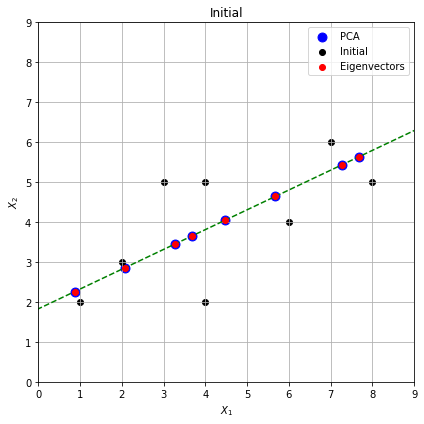

In [52]:
plt.figure(figsize=[6,6])

plt.scatter(X_2d_pca[:,0], X_2d_pca[:,1], s=80, c="blue", cmap=plt.cm.coolwarm, label="PCA")
plt.scatter(X[0,:], X[1,:], c="black", cmap=plt.cm.coolwarm, label="Initial")
plt.scatter(X_init[:,0], X_init[:,1], c="red", cmap=plt.cm.coolwarm, zorder=3, label="Eigenvectors")
plt.plot(xy[:,0], xy[:,1], "--", c="green")
plt.xlim([0,9])
plt.ylim([0,9])
plt.title("Initial")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Уменьшение размерности с PCA при классификации</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><b>Пример с логистической регрессией</b></p>

<p>Исходные данные</p>

In [53]:
x1 = np.array([1,2,3,4,4,6,7,8])
x2 = np.array([2,3,5,2,5,4,6,5])
X = np.vstack((x1, x2))

y1 = np.array([0,0,0,0,1,1,1,1])
y2 = np.array([0,0,0,0,1,0,1,1])

<p>Графики</p>

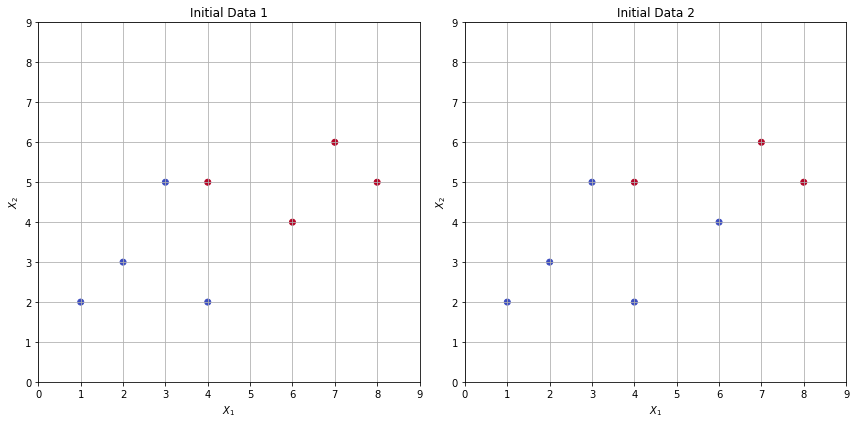

In [54]:
plt.figure(figsize=[12,6])

plt.subplot(1, 2, 1)

plt.scatter(X[0,:], X[1,:], c=y1, cmap=plt.cm.coolwarm)
plt.xlim([0,9])
plt.ylim([0,9])
plt.title("Initial Data 1")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X[0,:], X[1,:], c=y2, cmap=plt.cm.coolwarm)
plt.xlim([0,9])
plt.ylim([0,9])
plt.title("Initial Data 2")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.grid(True)


plt.tight_layout()
plt.show()

<p>Обучение и тестирование для исходных данных 1</p>

In [55]:
logReg = linear_model.LogisticRegression(penalty="l2", fit_intercept=True, max_iter=100, C=1e5, 
                                         solver="lbfgs", random_state=1234)
logReg.fit(X.T, y1)
accuracy_score_1 = logReg.score(X.T, y1)
accuracy_score_1

1.0

<p>Обучение и тестирование для исходных данных 2</p>

In [56]:
logReg.fit(X.T, y2)
accuracy_score_2 = logReg.score(X.T, y2)
accuracy_score_2

1.0

<p><b>Уменьшение размерности до одного признака с использованием PCA</b></p>

In [57]:
pca = PCA(n_components=1)
pca.fit(X.T)
X1_mat_pca = pca.transform(X.T)
X1_mat_pca

array([[ 3.91211356],
       [ 2.5720511 ],
       [ 0.78791792],
       [ 1.22413834],
       [-0.10807382],
       [-1.45598658],
       [-3.24011975],
       [-3.69204077]])

<p>Обучение и тестирование для преобразованных данных 1</p>

In [58]:
logReg.fit(X1_mat_pca, y1)
accuracy_score_pca_1 = logReg.score(X1_mat_pca, y1)
accuracy_score_pca_1

1.0

<p>Обучение и тестирование для преобразованных данных 2</p>

In [59]:
logReg.fit(X1_mat_pca, y2)
accuracy_score_pca_2 = logReg.score(X1_mat_pca, y2)
accuracy_score_pca_2

0.75

<p><b>В чем проблема?</b><br> Почему получили такой результат?<br> Какая особенность PCA повлияла?<br> Что можно сделать, чтобы получить всё-таки 1.0?</p>

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Источники</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [60]:
# TODO